# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Sela Naren Ardelita]
- **Email:** [m284b4kx4096@bangkit.academy]
- **ID Dicoding:** [sela_naren_ardelita]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah total pengguna di hari libur?
- Bagaimana hubungan antara jumlah total pengguna sepeda pada setiap jam?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kita mendapatkan informasi tentang data rental sepeda pada tiap harinya
- Kita mendapatkan informasi tentang data rental sepeda pada setiap jamnya

### Assessing Data

In [9]:
# Assesing Data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
# Assesing Data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Diketahui bahwa pada tabel day_df terdapat kesalahan tipe data untuk kolom dteday
- Diketahui bahwa pada tabel hour_df terdapat kesalahan tipe data untuk kolom dteday


### Cleaning Data

In [11]:
#Mengubah format dteday pada day_df
column = "dteday"
day_df[column] = pd.to_datetime(day_df[column])

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
#Mengubah format dteday pada hour_df
column = "dteday"
hour_df[column] = pd.to_datetime(hour_df[column])

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Membersihkan kesalahan tipe data pada tabel day_df dan tabel hour_df di kolom dteday


## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

In [15]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Mengeksplorasi korelasi antara cuaca dengan total pengguna

In [16]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})


instant      cnt                                     
           nunique      sum   max  min         mean          std
weathersit                                                      
1              463  2257952  8714  431  4876.786177  1879.483989
2              247   996858  8362  605  4035.862348  1809.109918
3               21    37869  4639   22  1803.285714  1240.284449

Menampilkan korelasi antara cuaca, hari libur dan total pengguna sepeda

In [17]:

day_df.groupby(by=["weathersit", "holiday"]).agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant      cnt                                      
                   nunique      sum   max   min         mean          std
weathersit holiday                                                       
1          0           448  2197509  8714   431  4905.154018  1870.527506
           1            15    60443  7403  1317  4029.533333  2015.514286
2          0           241   978866  8362   605  4061.684647  1792.876729
           1             6    17992  6043  1000  2998.666667  2326.161703
3          0            21    37869  4639    22  1803.285714  1240.284449

### Mengeksplorasi Data hour_df

In [18]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Menampilkan korelasi antara setiap jam dengan total pengguna sepeda

In [20]:
hour_df.groupby(by="hr").agg({"instant": "nunique","cnt": ["sum", "max", "min", "mean", "std"]
})

instant     cnt                                 
   nunique     sum  max min        mean         std
hr                                                 
0      726   39130  283   2   53.898072   42.307910
1      724   24164  168   1   33.375691   33.538727
2      715   16352  132   1   22.869930   26.578642
3      697    8174   79   1   11.727403   13.239190
4      697    4428   28   1    6.352941    4.143818
5      717   14261   66   1   19.889819   13.200765
6      725   55132  213   1   76.044138   55.084348
7      727  154171  596   1  212.064649  161.441936
8      727  261001  839   5  359.011004  235.189285
9      727  159438  426  14  219.309491   93.703458
10     727  126257  539   8  173.668501  102.205413
11     727  151320  663  10  208.143054  127.495536
12     728  184414  776   3  253.315934  145.081134
13     729  184919  760  11  253.661180  148.107657
14     729  175652  750  12  240.949246  147.271574
15     729  183149  750   7  251.233196  144.632541
16     730  227748  783  11  311.983562  148.682618
17     730  336860  976  15  461.452055  232.656611
18     728  309772  977  23  425.510989  224.639304
19     728  226789  743  11  311.523352  161.050359
20     728  164550  567  11  226.030220  119.670164
21     728  125445  584   6  172.314560   89.788893
22     728   95612  502   9  131.335165   69.937782
23     728   63941  256   2   87.831044   50.846889

Menambah kolom hr_group berdasarkan pembagian jam

In [22]:
hour_df["hr_group"] = hour_df.hr.apply(lambda x: "Dini Hari" if x>=0 and x<6
                                       else ("Pagi" if x>=6 and x<11
                                             else ("Siang" if x>=11 and x<15
                                                   else "Sore" if x>=15 and x<18 else "Malam")))
hour_df.groupby(by="hr_group").instant.nunique().sort_values(ascending=False)

,instant
hr_group,
Malam,4368
Dini Hari,4276
Pagi,3633
Siang,2913
Sore,2189


Menampilkan korelasi antara kelompok jam dengan total pengguna sepeda

In [23]:
hour_df.groupby(by="hr_group").agg({"instant": "nunique", "cnt": ["sum", "max", "min", "mean", "std"]})

instant     cnt                                 
          nunique     sum  max min        mean         std
hr_group                                                  
Dini Hari    4276  106509  283   1   24.908559   30.274492
Malam        4368  986109  977   2  225.757555  175.218285
Pagi         3633  755999  839   1  208.092210  170.351826
Siang        2913  696305  776   3  239.033642  143.378613
Sore         2189  747757  976   7  341.597533  200.415497

**Insight:**
- Pada eksplorasi day_df menampilkan korelasi antara cuaca dengan hari libur ditemukan bahwa pada cuaca 4 tidak ada pengguna sama sekali, sedangkan jumlah rata-rata pengguna paling banyak terletak di cuaca 1 dan jumlah pengguna paling sedikit terletak di cuaca 3.
- Pada eksplorasi hour_df menampilkan hubungan antara setiap jam yang dimana ditemukan pengguna sepeda memuncak pada malam hari walaupun rata-rata tertinggi berada di sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana pengaruh cuaca terhadap jumlah total pengguna di hari libur?


Korelasi antara cuaca dan hari libur

In [25]:
weather_holiday_df = day_df[day_df["holiday"] == 0].groupby(["weathersit"]).cnt.sum().sort_values(ascending=False).reset_index()
# karena tidak ada cuaca 4 maka akan kita tambahkan cuaca 4 dengan cnt bernilai 0.
if not (weather_holiday_df['weathersit'] == 4).any():
    new_row = pd.DataFrame({"weathersit": [4], "cnt": [0]})
    weather_holiday_df = pd.concat([weather_holiday_df, new_row], ignore_index=True)

weather_holiday_df.rename(columns={
    "weathersit": "weather_index", "cnt": "user_count"
}, inplace=True)

weather_holiday_df.head()

,weather_index,user_count
0,1,2197509
1,2,978866
2,3,37869
3,4,0


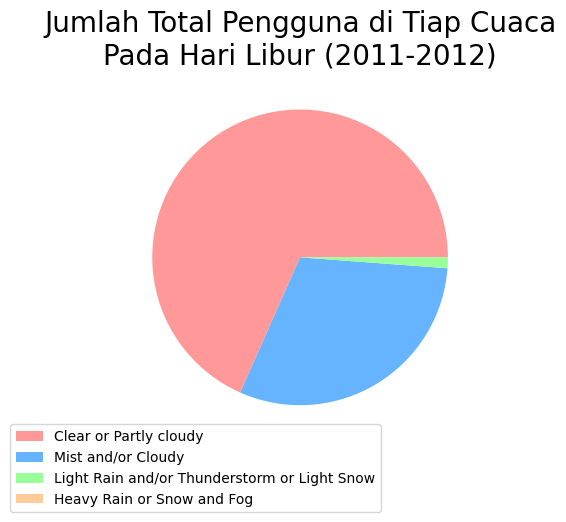

In [33]:
fig, ax = plt.subplots()
labels_detail = [
    'Clear or Partly cloudy',
    'Mist and/or Cloudy',
    'Light Rain and/or Thunderstorm or Light Snow',
    'Heavy Rain or Snow and Fog'
]
size = weather_holiday_df["user_count"]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
pie = plt.pie(size, startangle=0, colors=colors)
title = plt.title("Jumlah Total Pengguna di Tiap Cuaca\nPada Hari Libur (2011-2012)", fontsize=20)
title.set_ha("center")
plt.legend(
    pie[0],
    labels_detail,
    bbox_to_anchor=(0.65, -0.05),
    loc="lower right",
    bbox_transform=plt.gcf().transFigure
)
plt.show()

### Pertanyaan 2: Bagaimana hubungan antara jumlah total pengguna sepeda pada setiap jam?


Korelasi antara kelompok jam dengan total pengguna sepeda

In [34]:
byHourGroup_df = hour_df.groupby(by="hr_group").cnt.sum().reset_index()
byHourGroup_df.rename(columns={
    "hr_group": "hour_group",
    "cnt": "users_count"
}, inplace=True)
byHourGroup_df.head()


,hour_group,users_count
0,Dini Hari,106509
1,Malam,986109
2,Pagi,755999
3,Siang,696305
4,Sore,747757


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

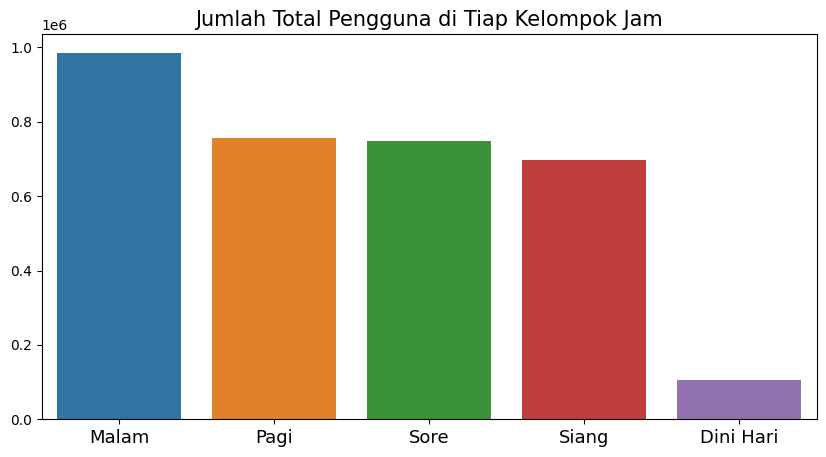

In [35]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="users_count",
    x="hour_group",
    hue="hour_group",
    data=byHourGroup_df.sort_values(by="users_count", ascending=False),
    legend=False
)
plt.title("Jumlah Total Pengguna di Tiap Kelompok Jam", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=13)
plt.show()

**Insight:**
- Pada visualisasi pertanyaan pertama terlihat bahwa pada hari libur saling berkaitan dengan faktor cuaca, dengan menggunakan pie chart sebagai patokan bahwa cuaca pertama yaitu cuaca/sedikit berawan merupakan faktor utama dimana pengguna banyak yang merental sepeda. Sedangkan pada cuaca ekstrim atau hujan deras tidak ada pengguna yang merental sepeda di tahun 2011 hingga tahun 2012.
- Pada visualisasi pertanyaan kedua terlihat bahwa pada jam malam sangat banyak pengguna yang merental sepeda dibandingkan dengan jam-jam lainnya seperti pada dini hari.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Jadi dapat disimpulkan bahwa cuaca sangat berpengaruh terhadap total perental sepeda. Salah satu faktor pendukung lainnya berada di Exploratory Data day_df dimana total perental sepeda di cuaca yang baik lebih besar dibandingkan dengan total perental sepeda di cuaca buruk. Sehingga dapat disimpulkan bahwa semakin cuaca menjadi buruk atau ekstrim maka semakin sedikit total perental sepeda.
- Conclution pertanyaan 2: Jadi dapat disimpulkan bahwa terdapat korelasi di tiap kelompok jam yang dikelompokkan berdasarkan Waktu dan total pengguna, salah satu faktor pendukung bahwa terdapat korelasi atau hubungan antara jumlah pengguna sepeda pada jam-jam tertentu adalah Bar Chart di atas, di mana pada pengguna lebih banyak aktif menggunakan rentalan sepeda pada malam hari.

### TO_DASHBOARD

In [36]:
hour_df.to_csv("hour_data.csv", index=False)

In [37]:
day_df.to_csv("day_data.csv", index=False)